In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import tensorflow
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<h2>Translating the .arff file to .csv file</h2>

In [3]:
string_lst = []
with open("KDDTrain+.arff","r") as f:
    lines = f.readlines()
for line in lines:
    if not line.startswith("@"):
        string_lst.append(line)
with open("train_data.csv","w") as f:
    f.writelines(string_lst)

In [4]:
string_lst = []
with open("KDDTest+.arff","r") as f:
    lines = f.readlines()
for line in lines:
    if not line.startswith("@"):
        string_lst.append(line)
with open("test_data.csv","w") as f:
    f.writelines(string_lst)

<h2>Reading the .csv file</h2>

In [2]:
df_train = pd.read_csv('train_data.txt')
df_test = pd.read_csv('test_data.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'train_data.txt'

<h2>Getting the names of the columns</h2>

In [4]:
columns = ['duration',
'protocol_type' ,
'service' ,
'flag' ,
 'src_bytes' ,
 'dst_bytes' ,
 'land' ,
 'wrong_fragment' ,
 'urgent' ,
 'hot' ,
 'num_failed_logins',
 'logged_in' ,
 'num_compromised' ,
 'root_shell' ,
 'su_attempted',
 'num_root' ,
 'num_file_creations' ,
 'num_shells' ,
 'num_access_files' ,
 'num_outbound_cmds' ,
 'is_host_login' ,
 'is_guest_login' ,
 'count' ,
 'srv_count' ,
 'serror_rate' ,
 'srv_serror_rate' ,
 'rerror_rate' ,
 'srv_rerror_rate' ,
 'same_srv_rate' ,
 'diff_srv_rate' ,
 'srv_diff_host_rate' ,
 'dst_host_count' ,
 'dst_host_srv_count' ,
 'dst_host_same_srv_rate' ,
 'dst_host_diff_srv_rate' ,
 'dst_host_same_src_port_rate' ,
 'dst_host_srv_diff_host_rate' ,
 'dst_host_serror_rate' ,
 'dst_host_srv_serror_rate' ,
 'dst_host_rerror_rate' ,
 'dst_host_srv_rerror_rate' ,
 'class' ]

In [5]:
df_train.columns =columns
df_test.columns =columns

In [7]:
print(df_train.columns.tolist())

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class']


In [8]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,anomaly
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,anomaly


In [14]:
df_info = pd.DataFrame(df_train.dtypes, columns=['Dtype'])
df_info.Dtype.unique().tolist()

[dtype('int64'), dtype('O'), dtype('float64')]

In [20]:
df_count = pd.DataFrame(df_train.count(), columns=['Count'])
(df_count['Count'] == 125972).all()

True

<h2>Shape of the Dataset</h2>

In [9]:
print("The shape of train data:",df_train.shape)
print("The shape of the test data:",df_test.shape)

The shape of train data: (125972, 42)
The shape of the test data: (22543, 42)


<h2>Checking for duplicate datapoints</h2>

In [10]:
if df_train.duplicated().any():
    print("Training set has duplicate datapoints")
if df_test.duplicated().any():
    print("Test set has duplicate datapoints")

Training set has duplicate datapoints
Test set has duplicate datapoints


<h2>De-Duping the datasets</h2>

In [11]:
#Dropping duplicate values
df_train.drop_duplicates(keep='first',inplace=True)
df_test.drop_duplicates(keep='first',inplace=True)
print("The shape of train data after deduping:",df_train.shape)
print("The shape of the test data after deduping:",df_test.shape)

The shape of train data after deduping: (125963, 42)
The shape of the test data after deduping: (22540, 42)


<h2>Resetting the indices</h2>

In [12]:
df_train.reset_index(inplace=True)
df_test.reset_index(inplace=True)
df_train.drop(columns='index',inplace=True)
df_test.drop(columns='index',inplace=True)

In [25]:
df_train_nunique = pd.DataFrame(df_train.nunique(),columns=['#Unique train'])
df_train_nunique[df_train_nunique['#Unique train'] == 1]

,#Unique train
num_outbound_cmds,1


<h2>Gathering various info about the dataset</h2>

In [13]:
df_train_num_rows = pd.DataFrame(df_train.count(),columns=['#rows train'])
df_train_dtypes = pd.DataFrame(df_train.dtypes,columns = ['Dtypes train'])
df_train_nunique = pd.DataFrame(df_train.nunique(),columns=['#Unique train'])
df_test_num_rows = pd.DataFrame(df_test.count(),columns=['#rows test'])
df_test_dtypes = pd.DataFrame(df_test.dtypes,columns = ['Dtypes test'])
df_test_nunique = pd.DataFrame(df_test.nunique(),columns=['#Unique test'])
df_info = pd.concat([df_train_num_rows,df_train_dtypes,df_train_nunique,
                     df_test_num_rows,df_test_dtypes,df_test_nunique],axis=1)
df_info

,#rows train,Dtypes train,#Unique train,#rows test,Dtypes test,#Unique test
duration,125963,int64,2981,22540,int64,624
protocol_type,125963,object,3,22540,object,3
service,125963,object,70,22540,object,64
flag,125963,object,11,22540,object,11
src_bytes,125963,int64,3341,22540,int64,1149
dst_bytes,125963,int64,9326,22540,int64,3650
land,125963,int64,2,22540,int64,2
wrong_fragment,125963,int64,3,22540,int64,3
urgent,125963,int64,4,22540,int64,4
hot,125963,int64,28,22540,int64,16


Conclusion from the above dataset:
1. All the columns of the train dataset has 125963 rows and for test there are 22540 rows And hence there is 
   no missing values in either the train and test dataset.
2. Both train and test has categorical, binary and numerical features.
3. The features protocol_type, service and flag are categorical features
   The features land, logged_in, root_shell, is_host_login, is_guest_login are binary features
   The rest of the features are numerical features
4. The target label is "class" which takes two values "normal" and "anomaly" and hence it is a binary classification
   problem.
5. The feature num_outbound_cmds takes only a single value and as such does not add any value to us. 

<h2>Dropping the num_outbound_cmds feature</h2>

In [14]:
df_train.drop(columns=['num_outbound_cmds'],inplace=True)
df_test.drop(columns=['num_outbound_cmds'],inplace=True)

<h2>Encoding the label as: normal=0, anomaly=1</h2>

In [15]:
df_train_label = np.where(df_train['class'] == 'normal',0,1)
df_train['class'] = df_train_label
df_train['class'].value_counts()

0    67342
1    58621
Name: class, dtype: int64

In [16]:
df_test_label = np.where(df_test['class'] == 'normal',0,1)
df_test['class'] = df_test_label
df_test['class'].value_counts()

1    12829
0     9711
Name: class, dtype: int64

<h2>Analysing the count of each category in protocol_type feature for each class</h2>

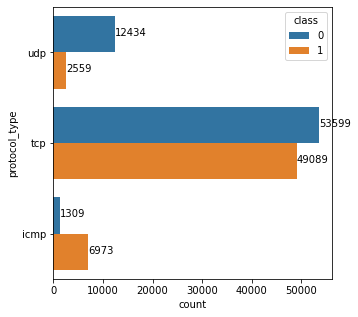

In [16]:
plt.figure(figsize=(5,5))
ax = sns.countplot(y="protocol_type", hue = "class",data=df_train)
for p in ax.patches:
    width = p.get_width()
    if np.isnan(width):
        width = 0
    plt.text(5+width, p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             )

From the above count plot it can be seen that, the <b>tcp</b> protocol is equally distributed among the normal and anomaly class labels hence it's not a great feature for classifying the label however, <b>udp and icmp</b> has good variation among the normal and anomaly class. As majority of the categories have a good variation among the class labels hence this feature can be considered for modelling.

<h2>Analysing the count of each category in service feature for each class</h2>

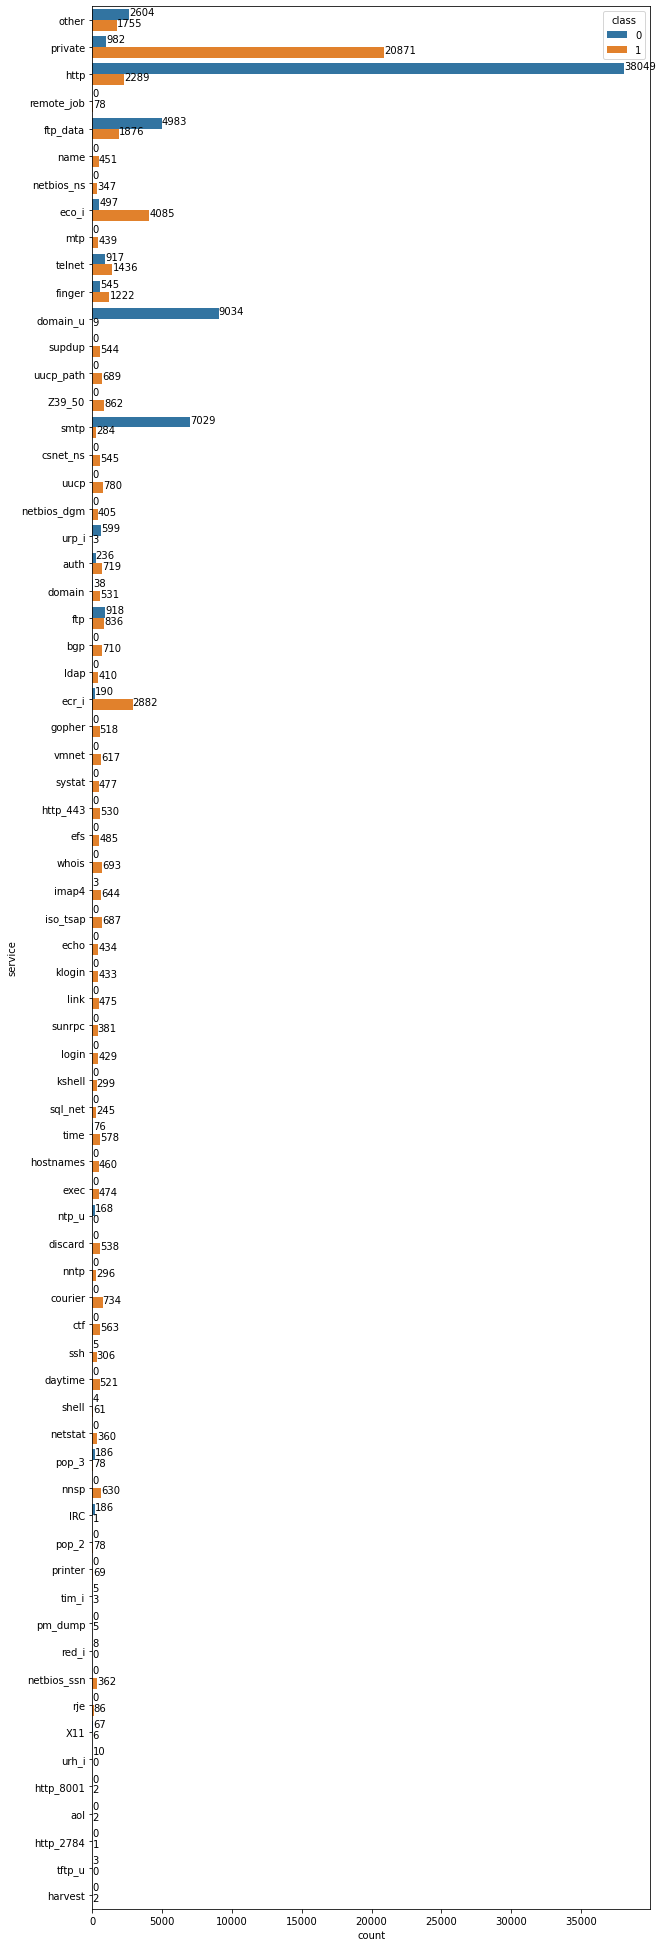

In [17]:
plt.figure(figsize=(10,35))
ax = sns.countplot(y="service", hue = "class",data=df_train)
for p in ax.patches:
    width = p.get_width()
    if np.isnan(width):
        width = 0
    plt.text(5+width, p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             )

From the above countplot it can be seen that most of the categories under service feature have good variation between the normal and anomaly class except for <b>ftp, telnet,ftp_data and others</b>. Hence, service is a good feature in distingushing the classes well barring some of the few mentioned categories.

<h2>Analysing the count of each category in flag feature for each class</h2>

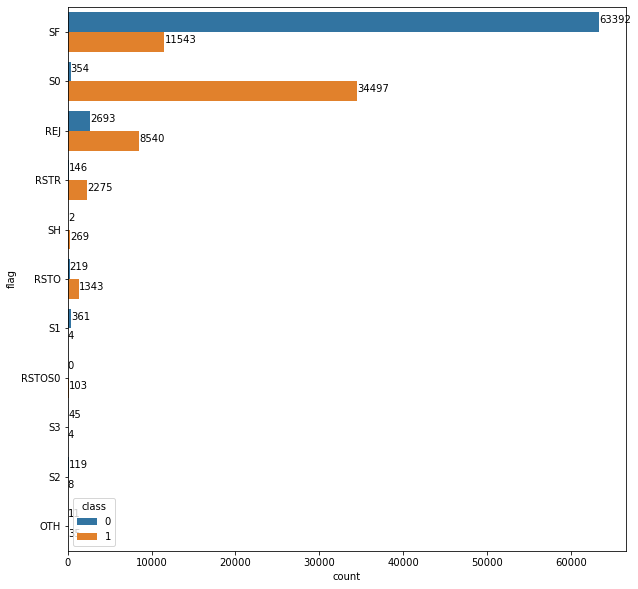

In [18]:
plt.figure(figsize=(10,10))
ax = sns.countplot(y="flag", hue = "class",data=df_train)
for p in ax.patches:
    width = p.get_width()
    if np.isnan(width):
        width = 0
    plt.text(5+width, p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             )

Here also except for <b>OTH</b> category others have good variation between the two class labels.

<h2>Analysing the binary features</h2>

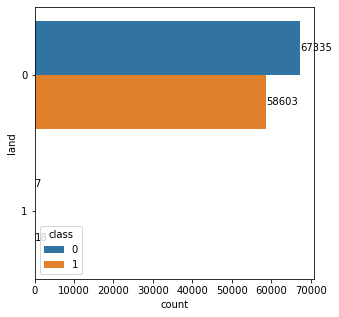

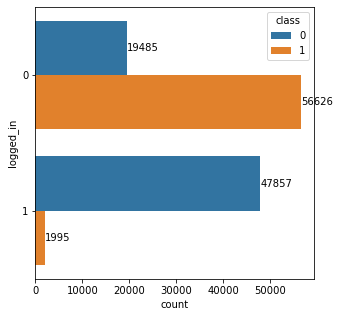

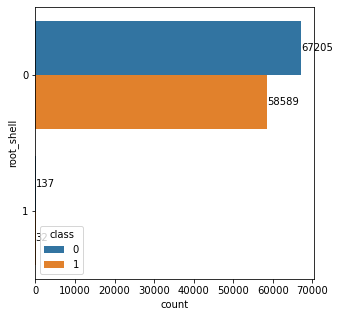

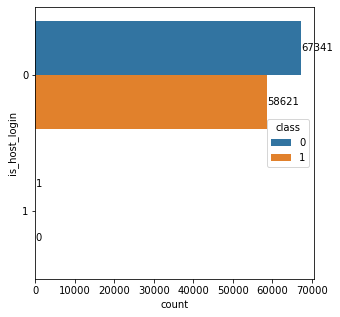

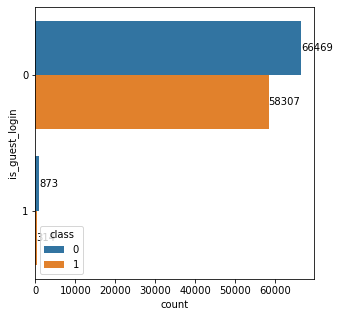

In [19]:
for col in ['land', 'logged_in', 'root_shell', 'is_host_login', 'is_guest_login']:
    plt.figure(figsize=(5,5))
    ax = sns.countplot(y=col, hue = "class",data=df_train)
    for p in ax.patches:
        width = p.get_width()
        if np.isnan(width):
            width = 0
        plt.text(5+width, p.get_y()+0.55*p.get_height(),
                 '{:1.0f}'.format(width),
                 )

Except for <b>logged_in</b>, non of the features possess good variation between the normal and anomaly class

<h2>Looking at the Numerical variables</h2>

In [18]:
df_train_num = df_train.drop(columns=['flag','service','protocol_type','land','logged_in','root_shell','is_host_login','is_guest_login'])
df_train_num

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,su_attempted,num_root,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
1,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
2,0,232,8153,0,0,0,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
3,0,199,420,0,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4,0,0,0,0,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125958,0,0,0,0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1
125959,8,105,145,0,0,0,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0
125960,0,2231,384,0,0,0,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0
125961,0,0,0,0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1


<h2>Various statistics between the two classes</h2>

In [34]:
df_stat_0 = df_train_num[df_train_num['class'] == 0].describe().T
col_0 = df_stat_0.columns.tolist()
col_0 = [x+"_0" for x in col_0]
df_stat_0.columns = col_0
df_stat_0

df_stat_1 = df_train_num[df_train_num['class'] == 1].describe().T
col_1 = df_stat_1.columns.tolist()
col_1 = [x+"_1" for x in col_1]
df_stat_1.columns = col_1
df_stat_1

df_stat = pd.concat([df_stat_0,df_stat_1],axis=1)
df_stat.sort_index(axis=1,inplace=True)
df_stat


,25%_0,25%_1,50%_0,50%_1,75%_0,75%_1,count_0,count_1,max_0,max_1,mean_0,mean_1,min_0,min_1,std_0,std_1
duration,0.00,0.00,0.00,0.00,0.00,0.00,67342.0,58621.0,40504.0,4.290800e+04,168.589899,423.385681,0.0,0.0,1304.461651,3.547953e+03
src_bytes,129.00,0.00,233.00,0.00,324.00,0.00,67342.0,58621.0,89581520.0,1.379964e+09,13133.467064,82832.855359,0.0,0.0,418116.235843,8.593684e+06
dst_bytes,105.00,0.00,379.00,0.00,2056.00,0.00,67342.0,58621.0,7028652.0,1.309937e+09,4329.749517,37530.243240,0.0,0.0,65463.301630,5.894443e+06
wrong_fragment,0.00,0.00,0.00,0.00,0.00,0.00,67342.0,58621.0,0.0,3.000000e+00,0.000000,0.048754,0.0,0.0,0.000000,3.699443e-01
urgent,0.00,0.00,0.00,0.00,0.00,0.00,67342.0,58621.0,3.0,2.000000e+00,0.000148,0.000068,0.0,0.0,0.017233,1.011679e-02
hot,0.00,0.00,0.00,0.00,0.00,0.00,67342.0,58621.0,77.0,2.800000e+01,0.230658,0.174289,0.0,0.0,2.308353,1.952010e+00
num_failed_logins,0.00,0.00,0.00,0.00,0.00,0.00,67342.0,58621.0,4.0,5.000000e+00,0.001381,0.001041,0.0,0.0,0.049480,3.981716e-02
num_compromised,0.00,0.00,0.00,0.00,0.00,0.00,67342.0,58621.0,7479.0,3.800000e+01,0.507083,0.017570,0.0,0.0,32.743564,2.368299e-01
su_attempted,0.00,0.00,0.00,0.00,0.00,0.00,67342.0,58621.0,2.0,1.000000e+00,0.002049,0.000017,0.0,0.0,0.061623,4.130222e-03
num_root,0.00,0.00,0.00,0.00,0.00,0.00,67342.0,58621.0,7468.0,5.400000e+01,0.562932,0.002712,0.0,0.0,33.368543,2.925368e-01


<h2>Visualizing the various statistics through Box-plot, Violine-plot and dist-plots</h2>

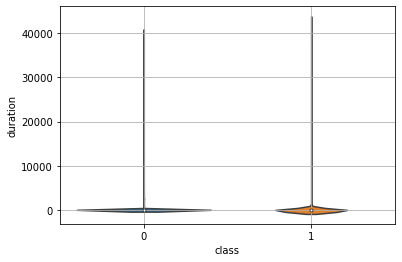

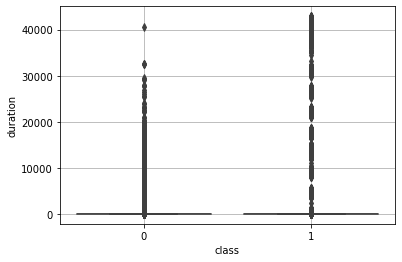

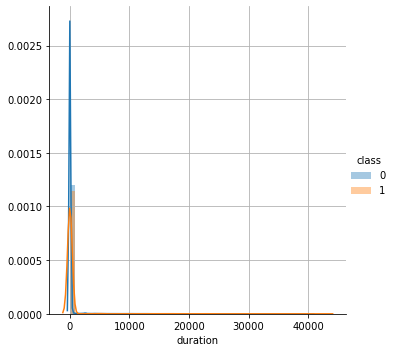

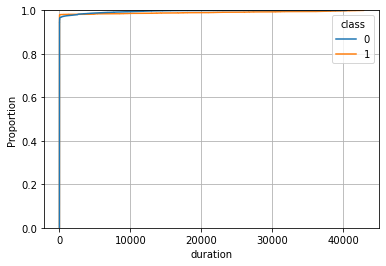

**************************************************


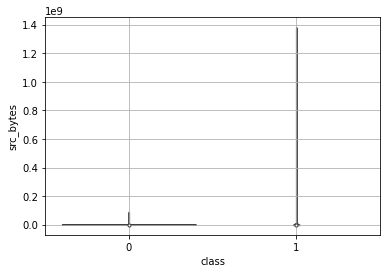

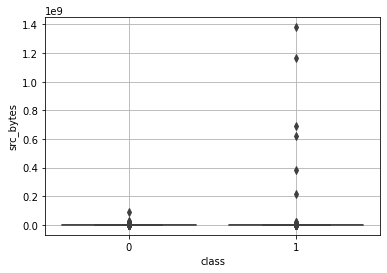

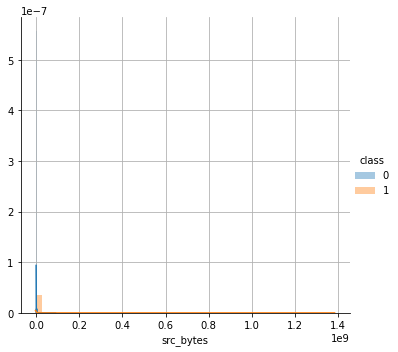

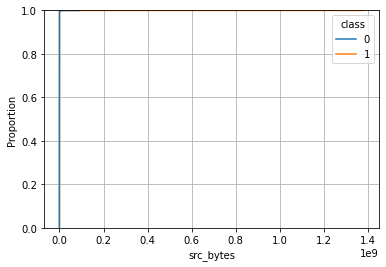

**************************************************


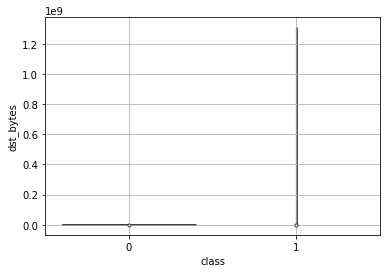

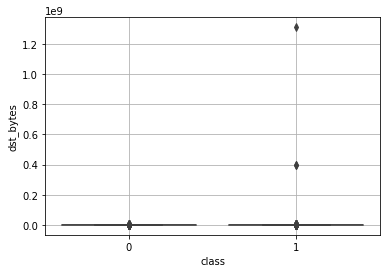

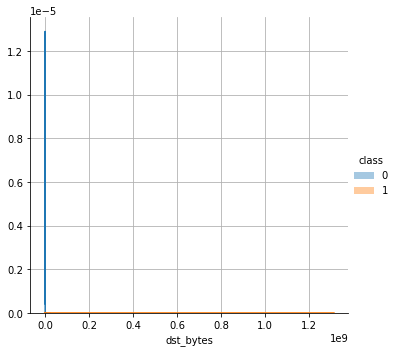

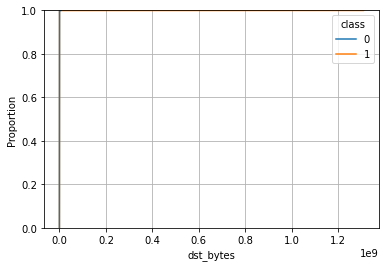

**************************************************


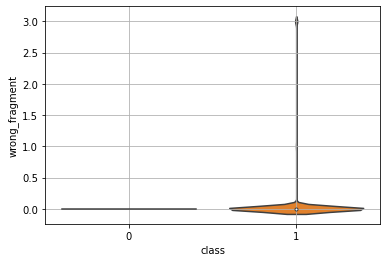

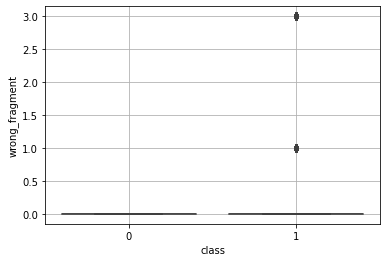

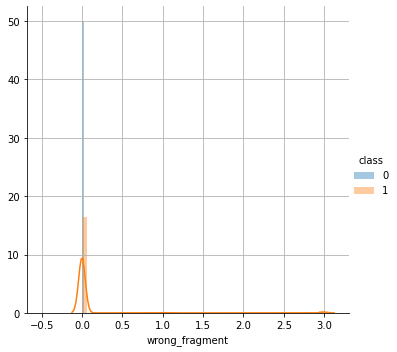

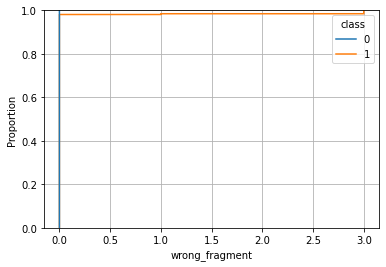

**************************************************


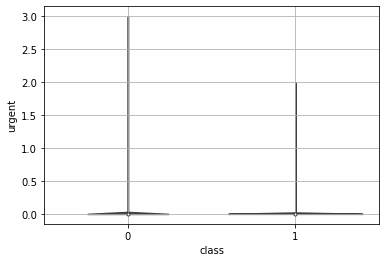

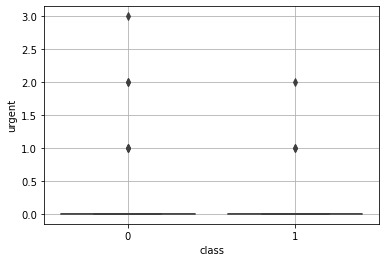

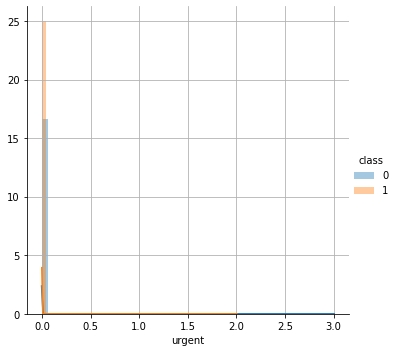

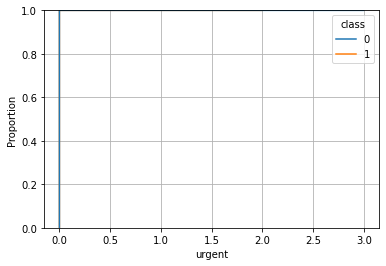

**************************************************


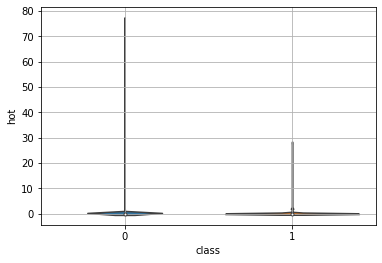

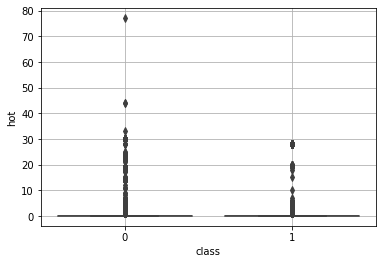

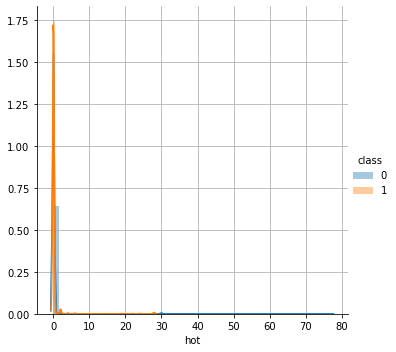

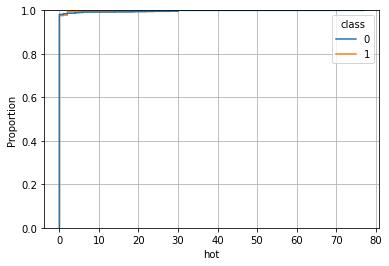

**************************************************


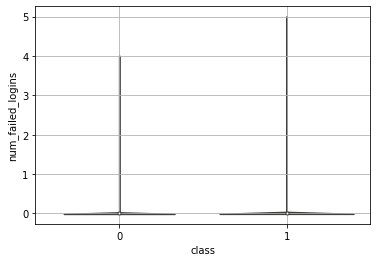

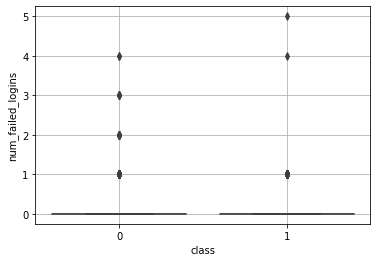

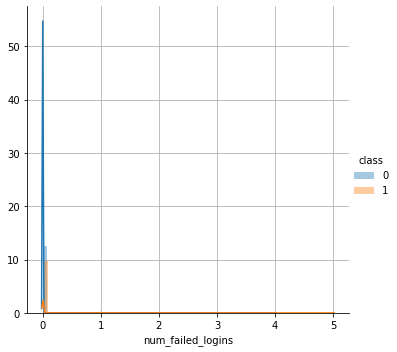

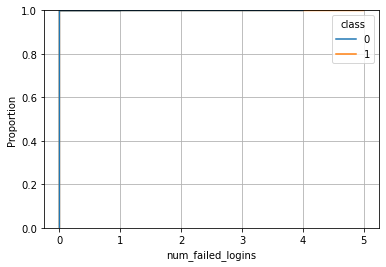

**************************************************


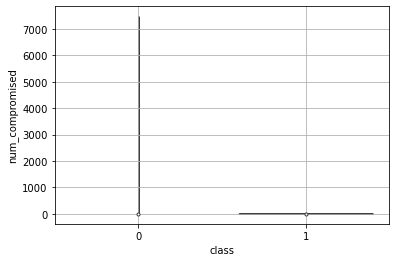

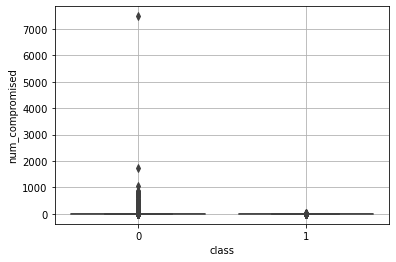

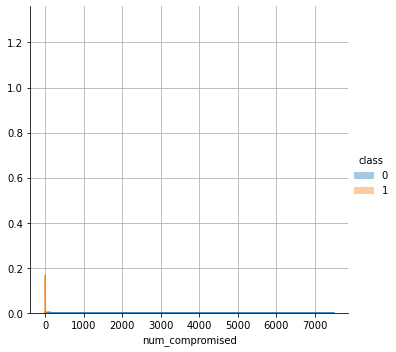

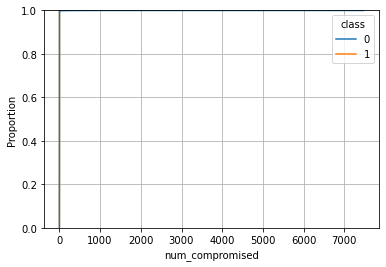

**************************************************


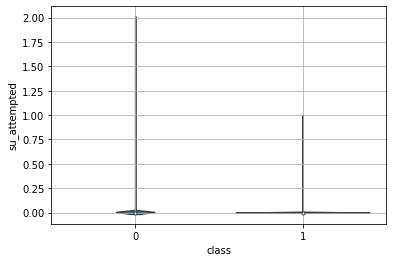

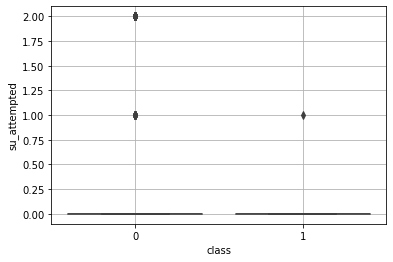

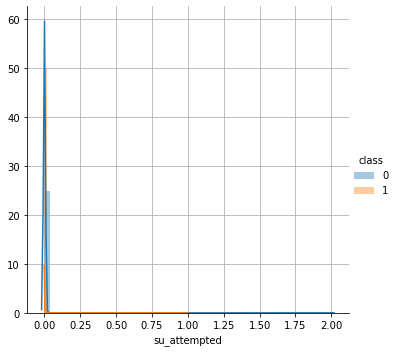

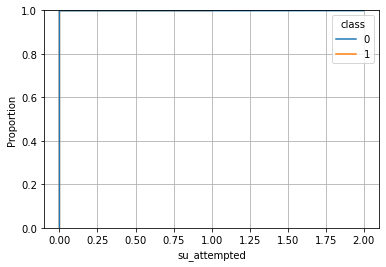

**************************************************


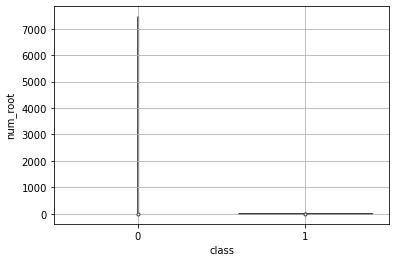

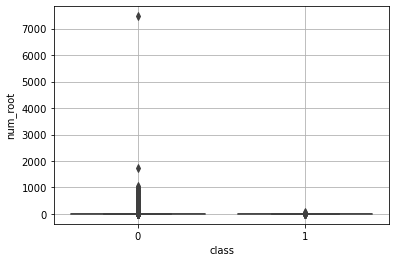

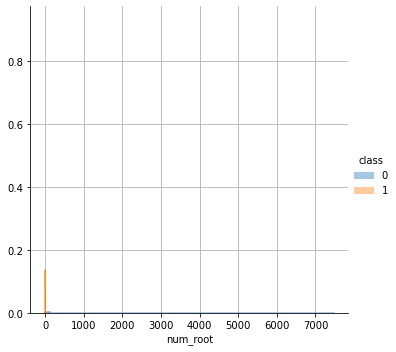

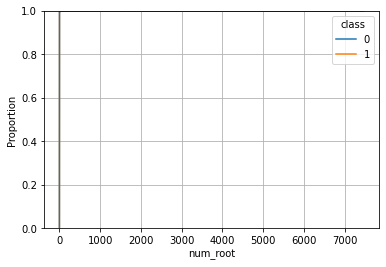

**************************************************


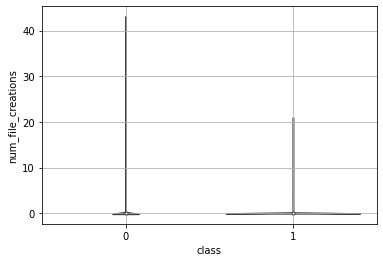

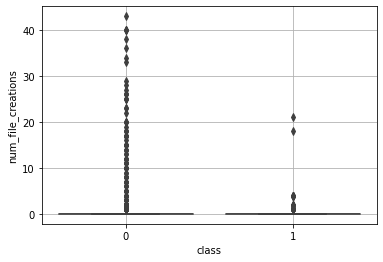

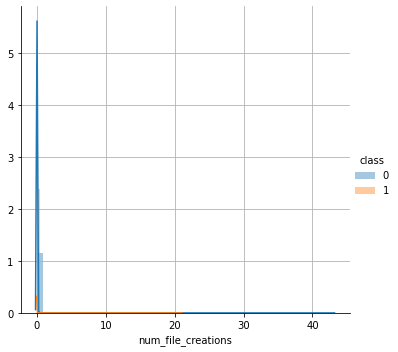

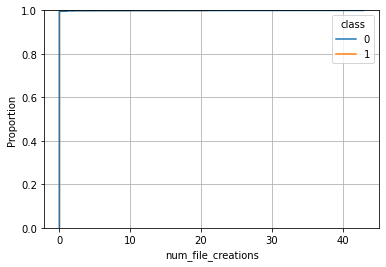

**************************************************


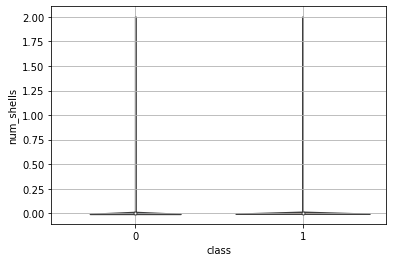

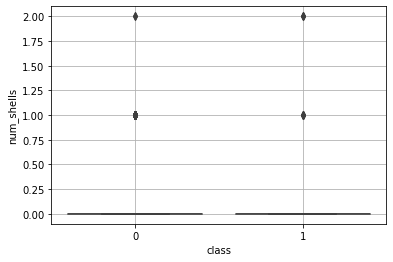

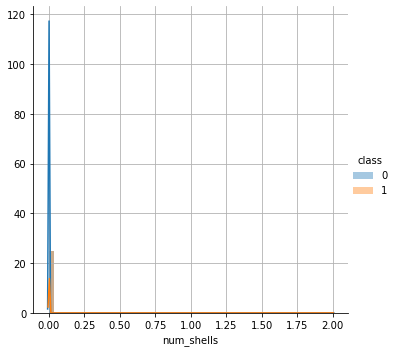

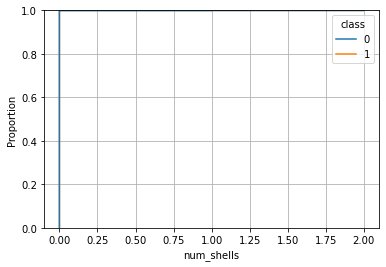

**************************************************


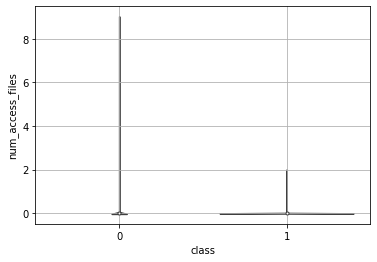

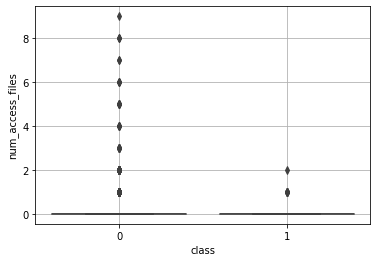

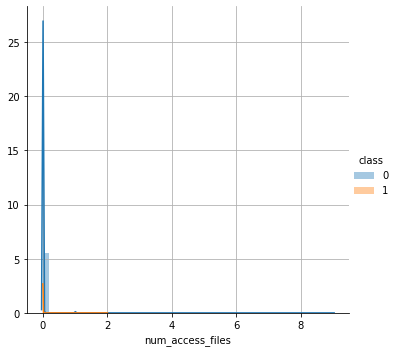

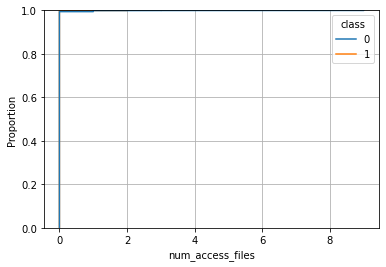

**************************************************


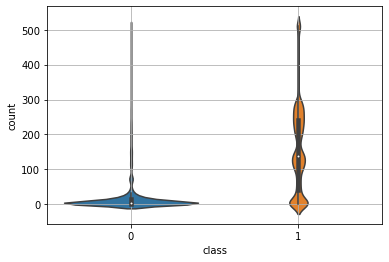

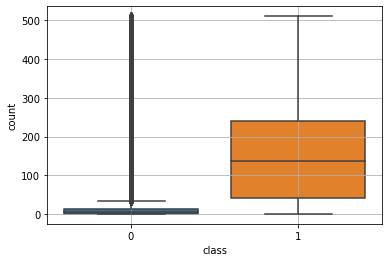

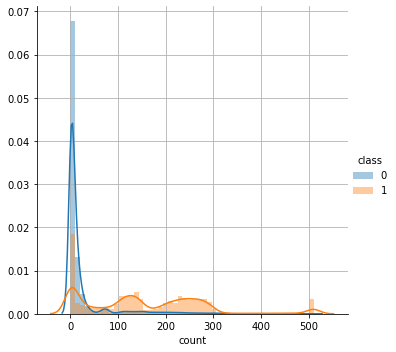

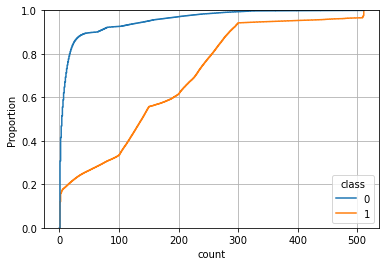

**************************************************


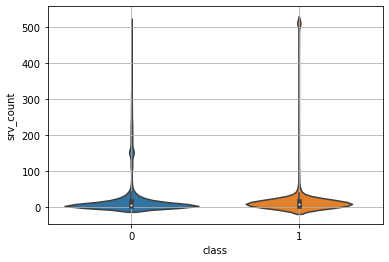

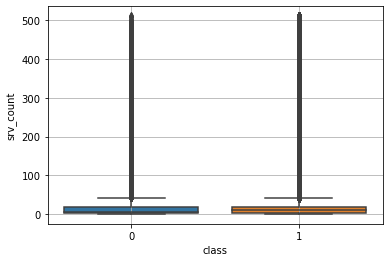

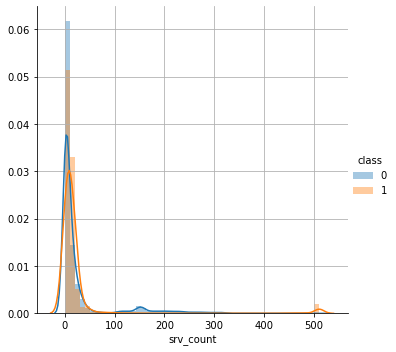

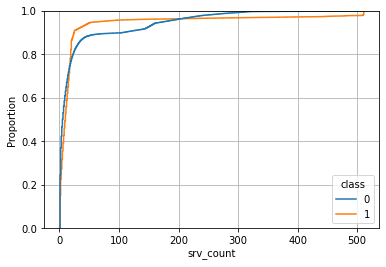

**************************************************


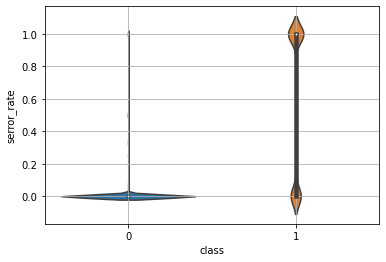

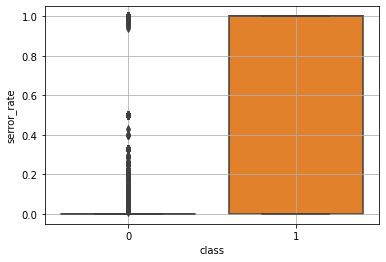

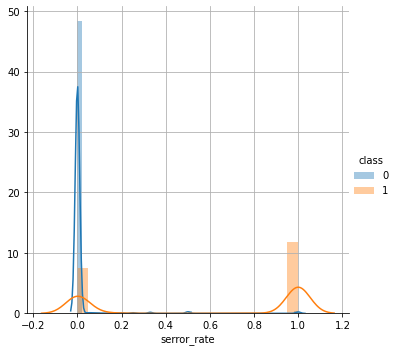

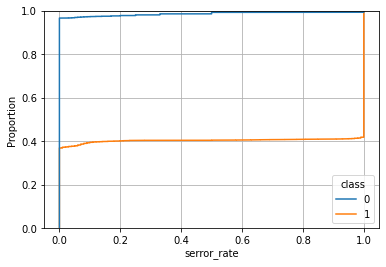

**************************************************


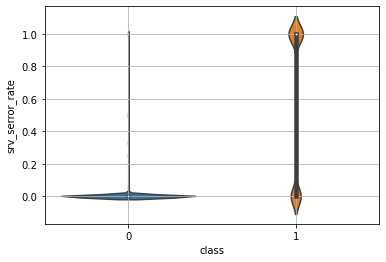

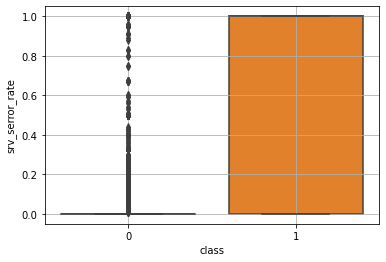

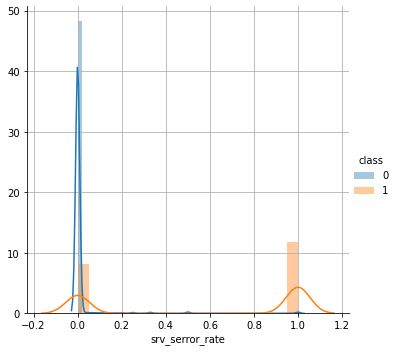

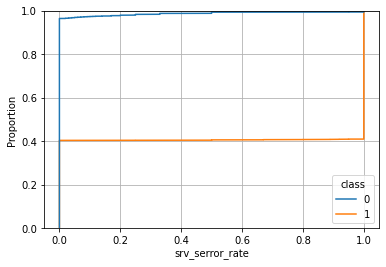

**************************************************


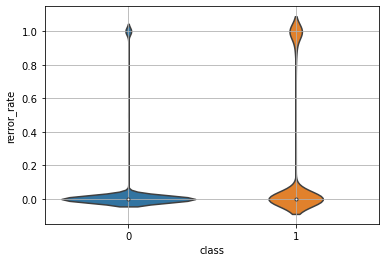

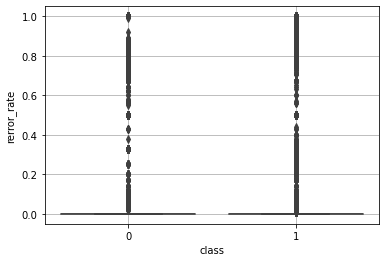

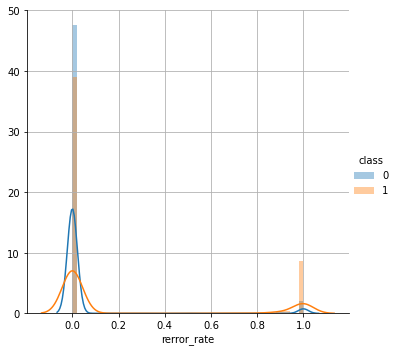

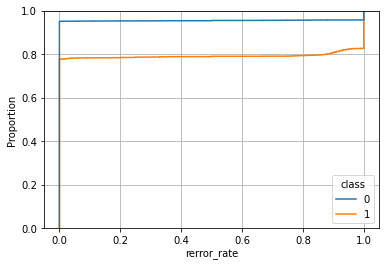

**************************************************


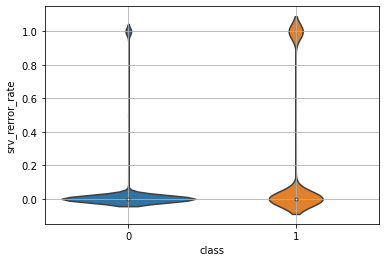

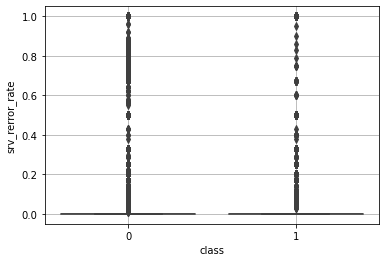

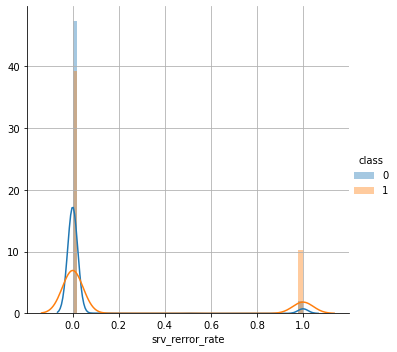

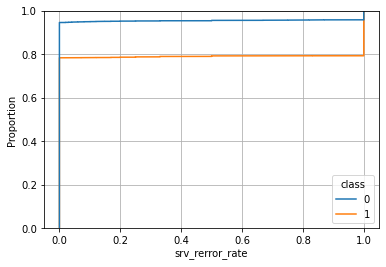

**************************************************


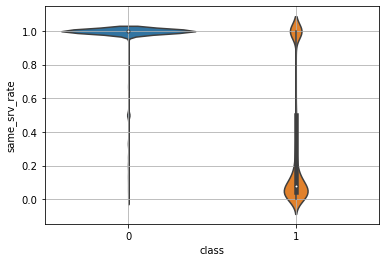

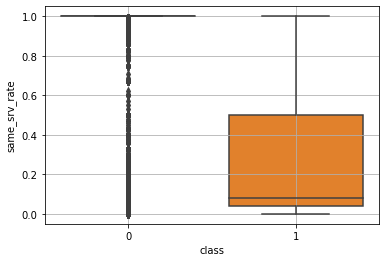

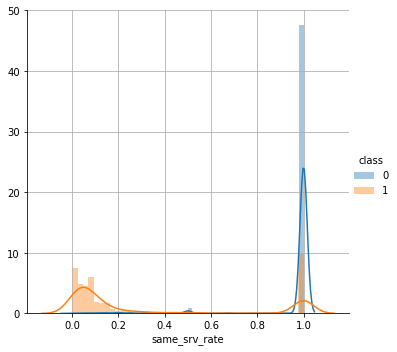

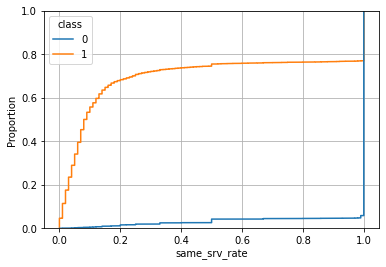

**************************************************


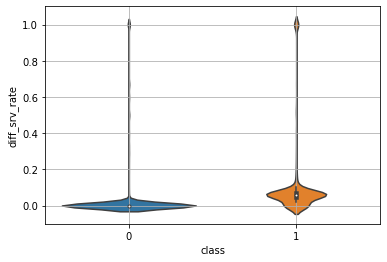

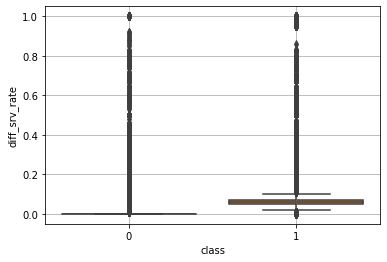

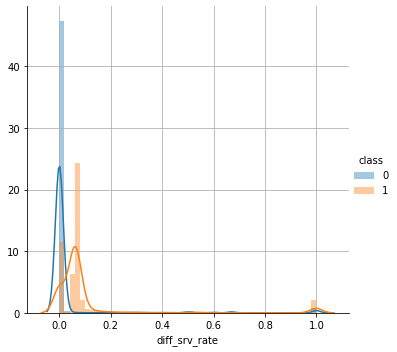

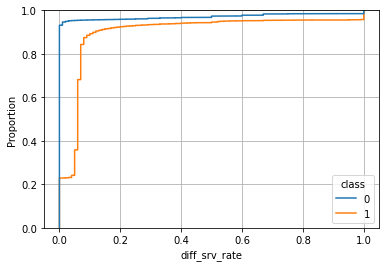

**************************************************


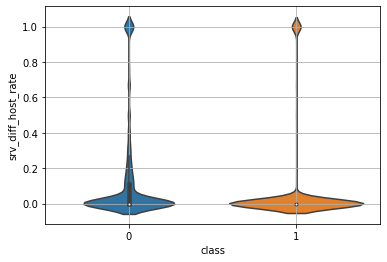

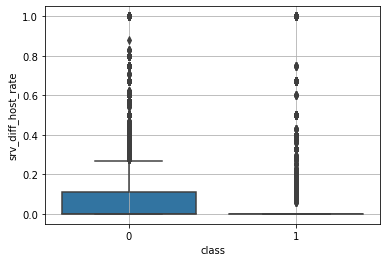

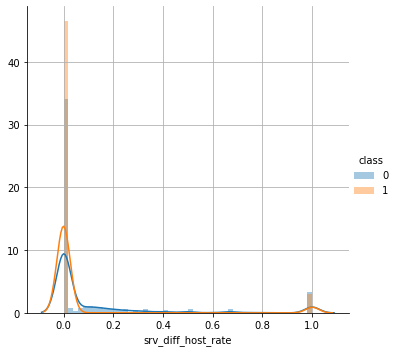

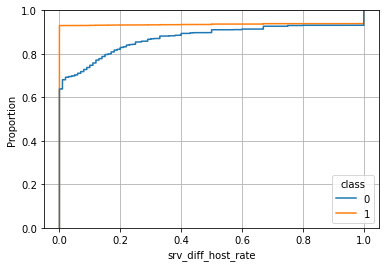

**************************************************


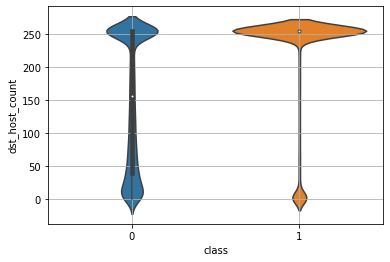

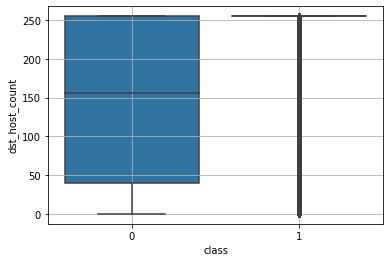

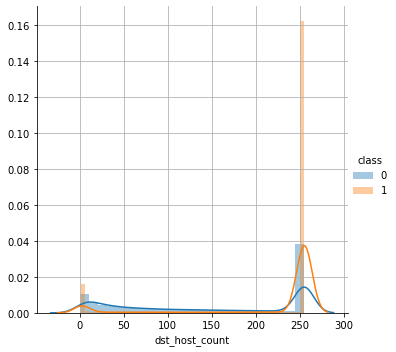

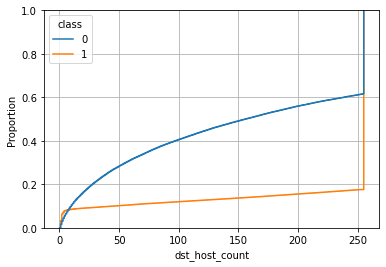

**************************************************


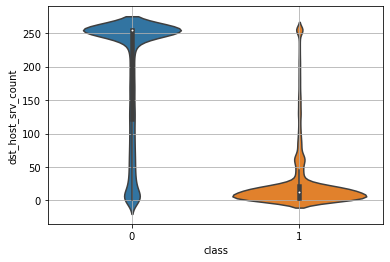

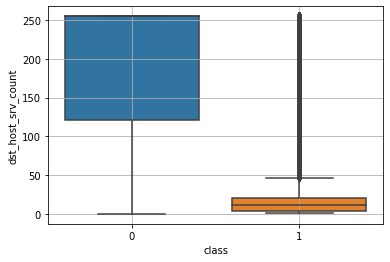

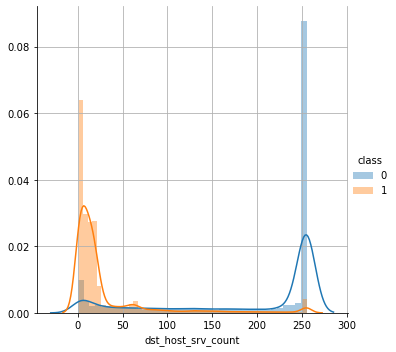

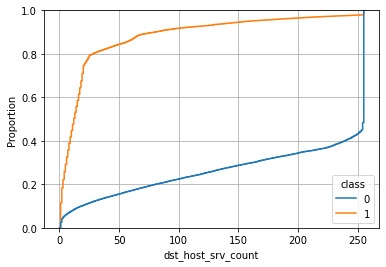

**************************************************


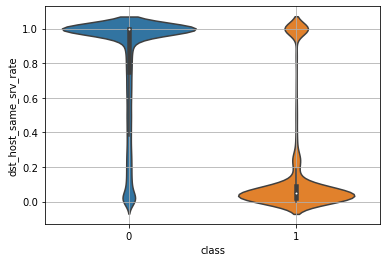

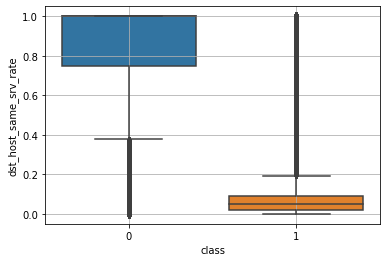

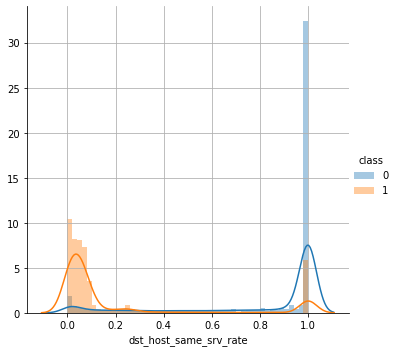

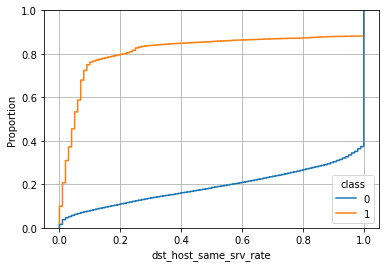

**************************************************


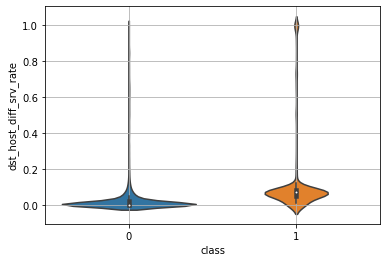

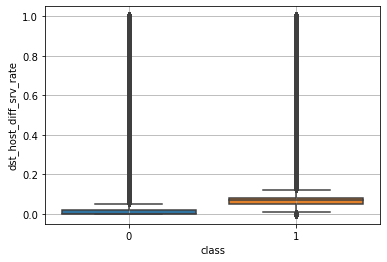

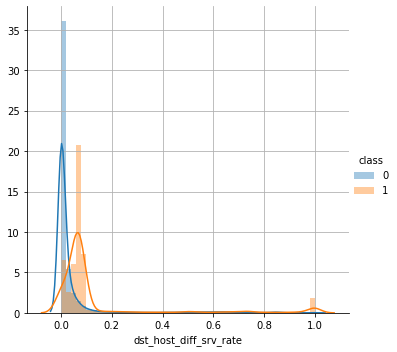

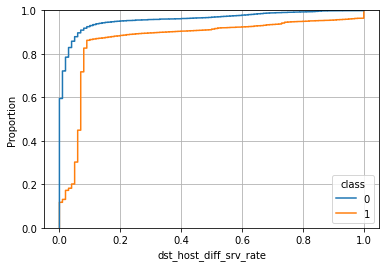

**************************************************


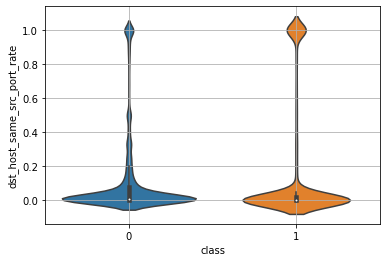

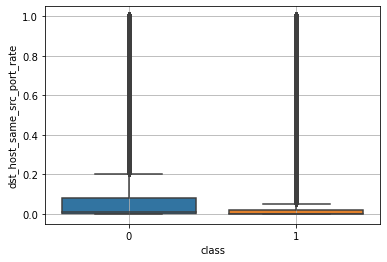

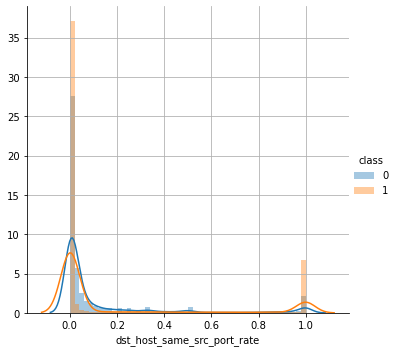

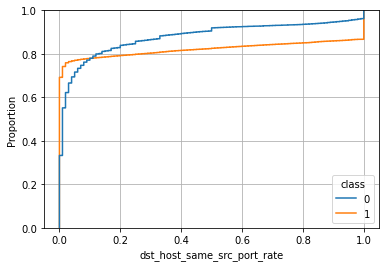

**************************************************


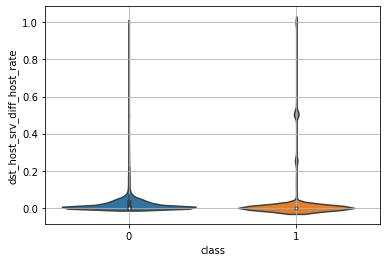

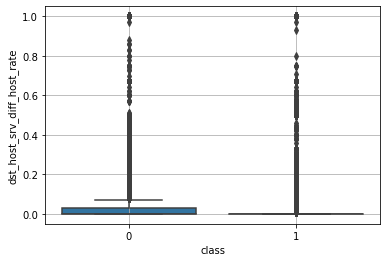

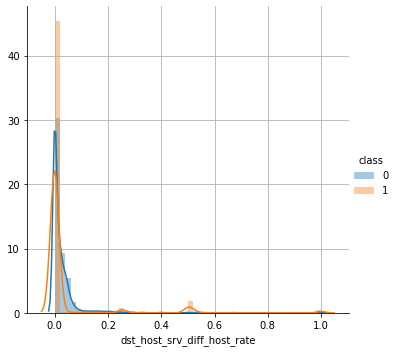

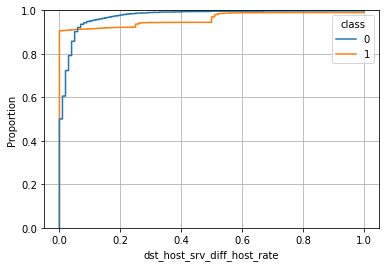

**************************************************


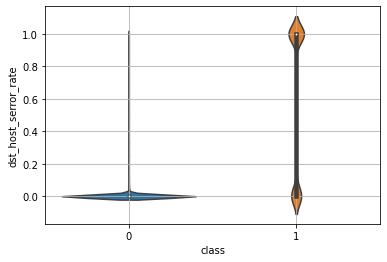

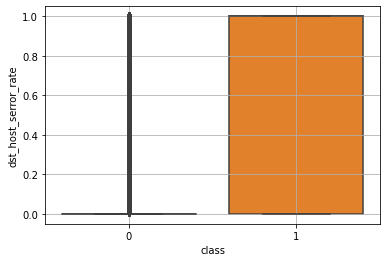

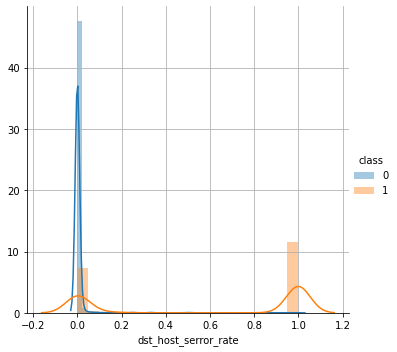

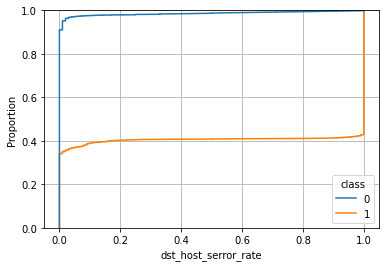

**************************************************


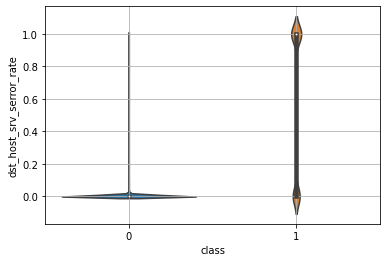

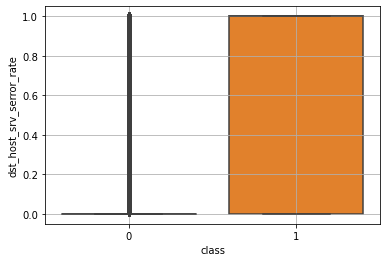

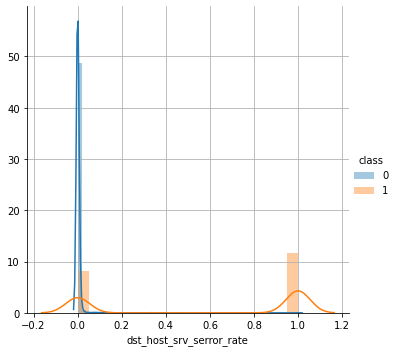

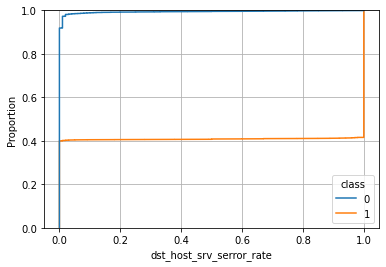

**************************************************


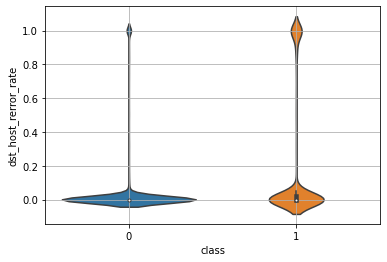

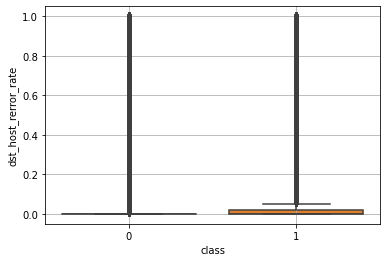

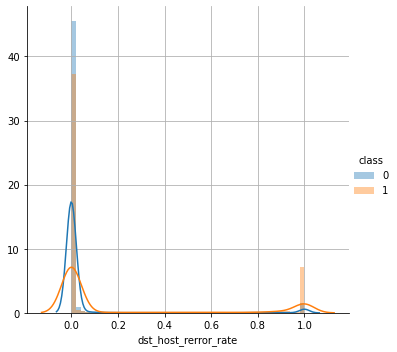

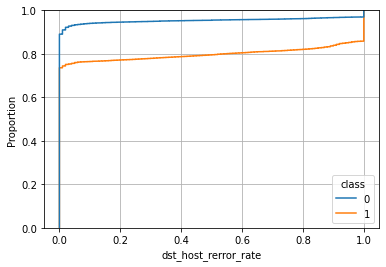

**************************************************


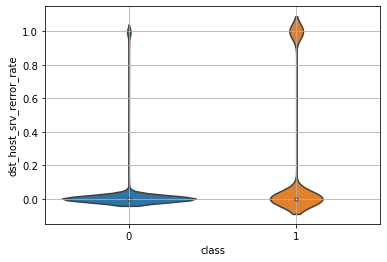

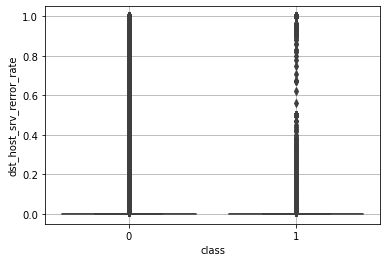

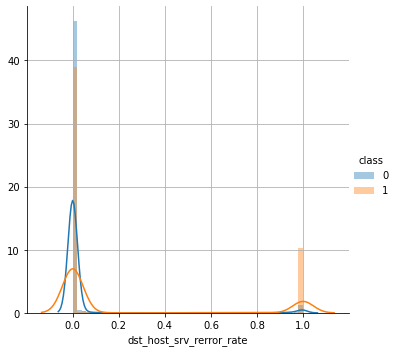

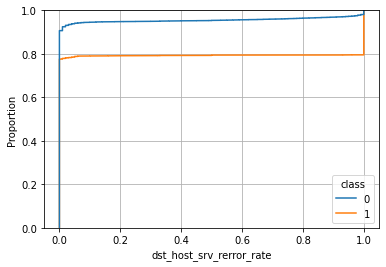

**************************************************


In [36]:

all_col = df_train_num.columns.tolist()
for col in all_col:
  
  if (col != 'class'):
    sns.violinplot(x='class',y=col,data=df_train_num)
    plt.grid()
    plt.show()
    sns.boxplot(x='class',y=col,data=df_train_num)
    plt.grid()
    plt.show()
    sns.FacetGrid(df_train_num,hue='class',height=5)\
    .map(sns.distplot,col)\
    .add_legend()
    plt.grid()
    plt.show()
    sns.ecdfplot(data=df_train_num,x=col,hue='class')
    plt.grid()
    plt.show()
    print("*"*50)

<h2>Conclusions fron the various univariate plots</h2>

1. Count feature has good separation between the box plots and the distribution also shows that for
   most of the normal traffic count value is very low however for anomalous traffic count tends to 
   be larger. Hence, it's a good feature to consider for modelling.
2. The serror_rate also has visible separation in the box and contour plots and the distribution 
   plots show that, serror_rate tends to be lower for normal traffic and higher for anomalous tra
   ffic. Hence, it's is also a good feature to consider.
3. The same_srv_rate has good distinction among the box plot and it's value tends to be smaller
   for anomalous traffic and large for normal traffic, hence it's a good feature to consider.
4. The dst_host_svr_count also has a nice separation in the box plots and the distribution shows
   that it's value tends to be smaller for anomalous traffic and large for normal traffic. Hence 
   it can be considered for featurization.
5. The dst_host_same_svr_rate also has a nice separation in the box plots and the distribution shows
   that it's value tends to be smaller for anomalous traffic and large for normal traffic. Hence 
   it can be considered for featurization. 
6. The dst_host_serror_rate also has a nice separation in the box plots and the distribution shows
   that it's value tends to be smaller for normal traffic and large for anomalous traffic. Hence 
   it can be considered for featurization.  
7. The dst_host_srv_serror_rate also has a nice separation in the box plots and the distribution shows
   that it's value tends to be smaller for normal traffic and large for anomalous traffic. Hence 
   it can be considered for featurization.   
8. The srv_serror_rate also has visible separation in the box and contour plots and the distribution 
   plots show that, serror_rate tends to be lower for normal traffic and higher for anomalous tra
   ffic. Hence, it's is also a good feature to consider.

<h2>Correlation analysis using heatmap</h2>

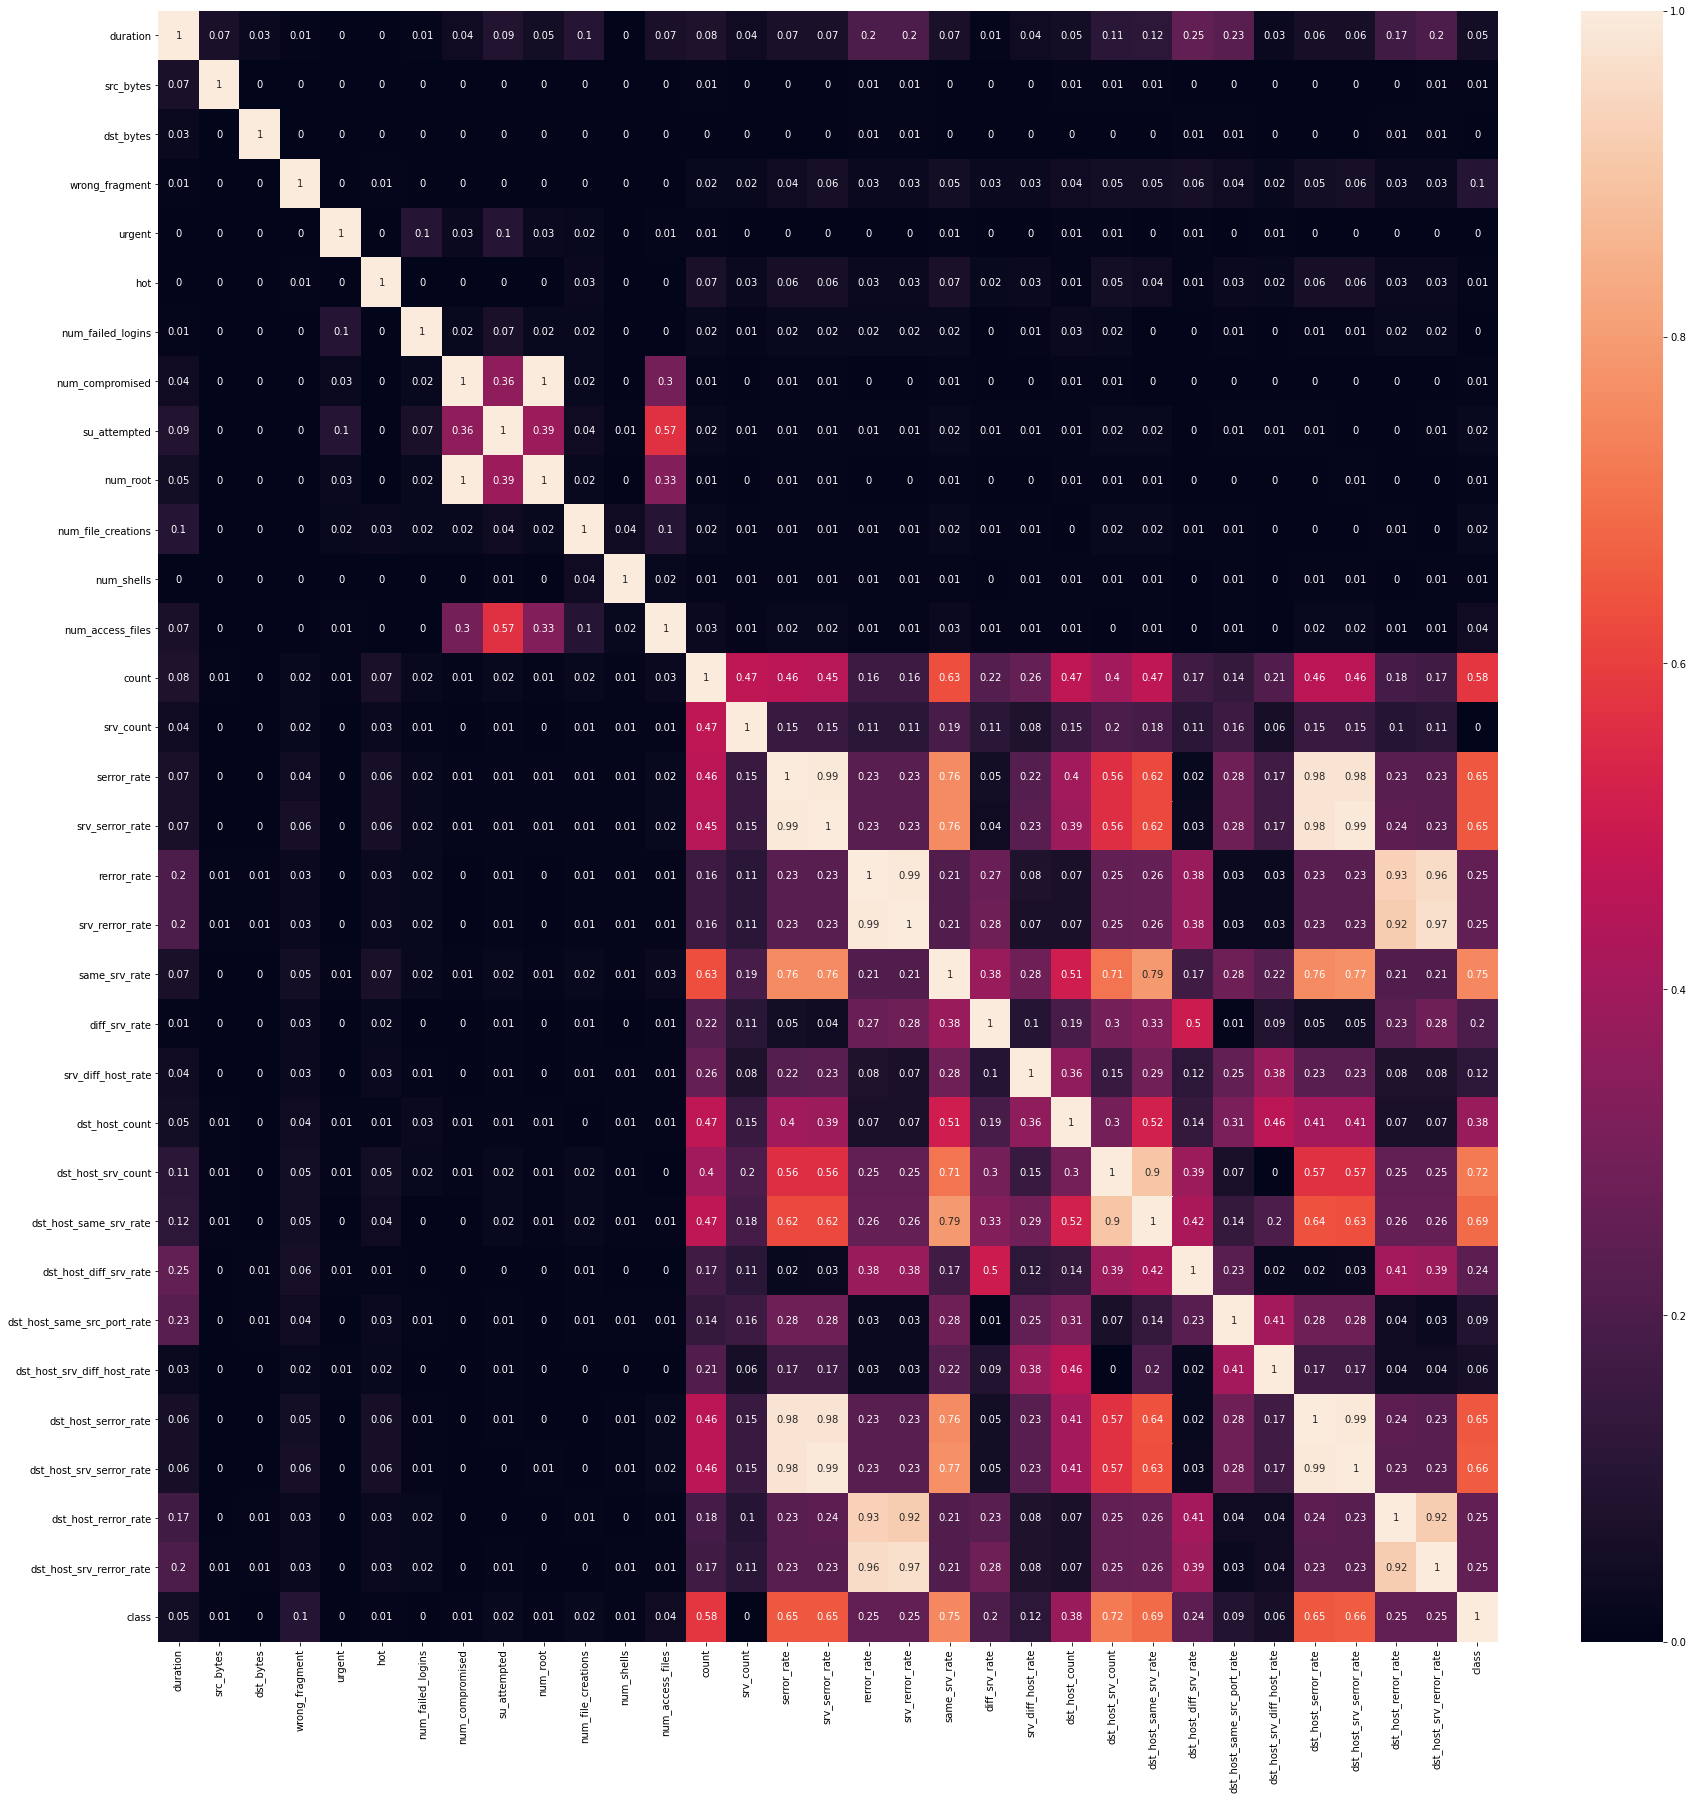

In [19]:
plt.figure(figsize=(30,30))
hm = sns.heatmap(data=df_train_num.corr().abs().round(decimals=2),
                annot=True)
  
# displaying the plotted heatmap
plt.show()

<h2>Picking up the features with correlation more than 0.5</h2>

In [19]:
df = pd.DataFrame(df_train_num.corr().abs()['class'])
df.sort_values(by = ['class'], inplace=True)
df = df[df['class'] > 0.5]
df.index.tolist()

['count',
 'srv_serror_rate',
 'serror_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_same_srv_rate',
 'dst_host_srv_count',
 'same_srv_rate',
 'class']

<h3>The correlation analysis also gives us the same features as obtained from the univariate plots</h3>

Here are the list of features obtained from our univariate analysis:
1. The list of features to be dropped from the categorical:
   'tcp', 'ftp', 'telnet','ftp_data','others', 'OTH'.
2. The list of features to be selected from the numerical features:
   'count','srv_serror_rate','serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_same_srv_rate',
   'dst_host_srv_count','same_srv_rate'
3. 'logged_in' to be included from the binary features

<h2>Featurizing the Dataset</h2>

<h3>separating the binary encoded categorical features and selecting only logged_in feature</h3>

In [20]:
df_train_binary_cat = df_train[['land','logged_in','root_shell','is_host_login','is_guest_login']]
df_train_ = df_train.drop(columns=['land','logged_in','root_shell','is_host_login','is_guest_login'])

df_test_binary_cat = df_test[['land','logged_in','root_shell','is_host_login','is_guest_login']]
df_test_ = df_test.drop(columns=['land','logged_in','root_shell','is_host_login','is_guest_login'])

<h2>Separating the label class:</h2>

In [21]:
label_train = df_train_['class']
label_test = df_test_['class']
df_train_.drop(columns=['class'],inplace=True)
df_test_.drop(columns=['class'],inplace=True)

<h2>separating the categorical features</h2>

In [22]:
cat_features_train = df_train_[['protocol_type','service','flag']]
cat_features_test = df_test_[['protocol_type','service','flag']]
df_train_drop_cat = df_train_.drop(columns=['protocol_type','service','flag'])
df_test_drop_cat = df_test_.drop(columns=['protocol_type','service','flag'])
df_train_.drop(columns=['protocol_type','service','flag'],inplace=True)
df_test_.drop(columns=['protocol_type','service','flag'],inplace=True)
cat_features_train

,protocol_type,service,flag
0,udp,other,SF
1,tcp,private,S0
2,tcp,http,SF
3,tcp,http,SF
4,tcp,private,REJ
...,...,...,...
125958,tcp,private,S0
125959,udp,private,SF
125960,tcp,smtp,SF
125961,tcp,klogin,S0


<h2>One Hot Encoding the categorical features</h2>

In [23]:
ohe = OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(cat_features_train)
#toarray() is used to convert from dense matrix to sparse matrix
ohe_train = ohe.transform(cat_features_train).toarray()
ohe_test= ohe.transform(cat_features_test).toarray()

<h3>Getting all the one hot encoded columns</h3>

In [24]:
cat_columns = []
for arr in ohe.categories_:
    for ele in arr:
        cat_columns.append(ele)

<h2>Normalizing the numerical features</h2>

In [25]:
mm_scale = MinMaxScaler()
mm_scale.fit(df_train_)
df_train_nor = mm_scale.transform(df_train_)
df_test_nor = mm_scale.transform(df_test_)

<h2>Stacking up the various features</h2>

In [26]:
columns = ['land','logged_in','root_shell','is_host_login','is_guest_login'] + cat_columns + df_train_.columns.tolist()

df_train_final = np.vstack((df_train_binary_cat.values.T,ohe_train.T,df_train_nor.T)).T
df_test_final = np.vstack((df_test_binary_cat.values.T,ohe_test.T,df_test_nor.T)).T

df_train_final = pd.DataFrame(df_train_final,columns=columns)
df_test_final = pd.DataFrame(df_test_final,columns=columns)

<h2>Saving the Dataset after preprocessing</h2>

In [27]:
df_train_final.to_csv('train_preprocessed.csv')
df_test_final.to_csv('test_preprocessed.csv')

df_train_label = pd.DataFrame(label_train, columns=['class'])
df_test_label = pd.DataFrame(label_test, columns=['class'])

df_train_label.to_csv("train_label.csv")
df_test_label.to_csv("test_label.csv")

<h2>Reading back the Dataset</h2>

In [28]:
df_test_preprocess = pd.read_csv('test_preprocessed.csv')
df_test_preprocess.drop(columns='Unnamed: 0',inplace=True)

df_train_preprocess = pd.read_csv('train_preprocessed.csv')
df_train_preprocess.drop(columns='Unnamed: 0',inplace=True)

df_train_label = pd.read_csv("train_label.csv")
label_train = df_train_label.drop(columns='Unnamed: 0').values.reshape(1,-1)[0]

df_test_label = pd.read_csv("test_label.csv")
label_test = df_test_label.drop(columns='Unnamed: 0').values.reshape(1,-1)[0]

<h3>Looking at the shapes of various datasets</h3>

In [30]:
print(df_train_preprocess.shape)
print(df_test_preprocess.shape)
print(label_train.shape)
print(label_test.shape)

(125963, 121)
(22540, 121)
(125963,)
(22540,)


<h2>1. Manual selection of features</h2>


In [31]:
cat_col_drop = ['tcp', 'ftp', 'telnet','ftp_data','other', 'OTH']
for col in cat_col_drop:
    cat_columns.remove(col)
    


In [32]:
bin_columns = ['logged_in']
num_columns = ['count','srv_serror_rate','serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_same_srv_rate', 'dst_host_srv_count','same_srv_rate']

In [33]:
#Manually selected columns
col_manual_sel = cat_columns+bin_columns+num_columns

In [34]:
df_train_preprocess = df_train_preprocess[col_manual_sel]
df_test_preprocess = df_test_preprocess[col_manual_sel]

In [35]:
df_train_preprocess.to_csv("df_train_manual.csv")
df_test_preprocess.to_csv("df_test_manual.csv")

<h2>2. Feature selection using Chi-squared and Anova test</h2>

In [36]:
#separating the binary encoded categorical features
df_train_binary_cat = df_train[['land','logged_in','root_shell','is_host_login','is_guest_login']]
df_train_no_bin_cat = df_train.drop(columns=['land','logged_in','root_shell','is_host_login','is_guest_login'])

df_test_binary_cat = df_test[['land','logged_in','root_shell','is_host_login','is_guest_login']]
df_test_no_bin_cat = df_test.drop(columns=['land','logged_in','root_shell','is_host_login','is_guest_login'])

In [37]:
#separating the categorical features
cat_features_train = df_train[['protocol_type','service','flag']]
cat_features_test = df_test[['protocol_type','service','flag']]
df_train_drop_cat = df_train.drop(columns=['protocol_type','service','flag'])
df_test_drop_cat = df_test.drop(columns=['protocol_type','service','flag'])
df_train_no_bin_cat.drop(columns=['protocol_type','service','flag','class'],inplace=True)
df_test_no_bin_cat.drop(columns=['protocol_type','service','flag','class'],inplace=True)
cat_features_train

,protocol_type,service,flag
0,udp,other,SF
1,tcp,private,S0
2,tcp,http,SF
3,tcp,http,SF
4,tcp,private,REJ
...,...,...,...
125958,tcp,private,S0
125959,udp,private,SF
125960,tcp,smtp,SF
125961,tcp,klogin,S0


In [38]:
oe = OrdinalEncoder()
oe.fit(cat_features_train)
cat_features_train_oe = oe.transform(cat_features_train)
cat_features_test_oe = oe.transform(cat_features_test)

In [39]:
df_cat_features_train_oe = pd.DataFrame(cat_features_train_oe,columns=['protocol_type','service','flag'])
df_cat_features_test_oe = pd.DataFrame(cat_features_test_oe,columns=['protocol_type','service','flag'])

In [40]:
#concatenating the categorical and binary features
df_train_cat_boolean = pd.concat([df_cat_features_train_oe,df_train_binary_cat],axis=1)
df_train_cat_boolean

,protocol_type,service,flag,land,logged_in,root_shell,is_host_login,is_guest_login
0,2.0,44.0,9.0,0,0,0,0,0
1,1.0,49.0,5.0,0,0,0,0,0
2,1.0,24.0,9.0,0,1,0,0,0
3,1.0,24.0,9.0,0,1,0,0,0
4,1.0,49.0,1.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
125958,1.0,49.0,5.0,0,0,0,0,0
125959,2.0,49.0,9.0,0,0,0,0,0
125960,1.0,54.0,9.0,0,1,0,0,0
125961,1.0,30.0,5.0,0,0,0,0,0


In [41]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(df_train_cat_boolean, label_train)
X_train_fs = fs.transform(df_train_cat_boolean)

In [42]:
df_train_cat_boolean.columns

Index(['protocol_type', 'service', 'flag', 'land', 'logged_in', 'root_shell',
       'is_host_login', 'is_guest_login'],
      dtype='object')

In [43]:
cat_bin_features_in_order = np.flipud(np.argsort(fs.scores_))
cat_col_sorted = []
idx = 1
for i in cat_bin_features_in_order:
    cat_col_sorted.append(df_train_cat_boolean.columns.tolist()[i])
    print("The number {} most important feature is {}".format(idx,df_train_cat_boolean.columns.tolist()[i]))
    idx += 1

The number 1 most important feature is service
The number 2 most important feature is flag
The number 3 most important feature is logged_in
The number 4 most important feature is protocol_type
The number 5 most important feature is is_guest_login
The number 6 most important feature is root_shell
The number 7 most important feature is land
The number 8 most important feature is is_host_login


In [44]:
#Separating the categorical, boolean and numerical features
fs = SelectKBest(score_func=f_classif, k=10)
# apply feature selection
X_selected = fs.fit_transform(df_train_no_bin_cat, label_train)

In [45]:
#List of the most important numerical features
numerical_features_in_order = fs.get_feature_names_out()

In [46]:
numerical_features_in_order

array(['count', 'serror_rate', 'srv_serror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate'], dtype=object)

In [47]:
#The most important features are
col = list(cat_col_sorted[:4]) + list(numerical_features_in_order)

In [48]:
#Dataset after chi-squared and Anova
df_train_chi_anova = df_train[col]
df_test_chi_anova = df_test[col]

In [49]:
def one_hot(df_train,df_test):
    
    cat_columns = []
    ohe = OneHotEncoder()
    ohe.fit(df_train)
    df_train_ohe = ohe.transform(df_train).toarray()
    df_test_ohe = ohe.transform(df_test).toarray()
    for arr in ohe.categories_:
        for ele in arr:
            cat_columns.append(ele)
    return df_train_ohe, df_test_ohe,cat_columns

In [50]:
#The categorical columns are
df_info_ohe = pd.DataFrame(df_train_chi_anova.dtypes,columns=['Dtypes'])
idx = df_info_ohe.index[df_info_ohe['Dtypes'] == 'object']
cat_col = idx.tolist()

In [51]:
df_train_chi_anova_cat = df_train_chi_anova[cat_col]
df_test_chi_anova_cat = df_test_chi_anova[cat_col]
df_train_chi_anova_num = df_train_chi_anova.drop(columns=cat_col)
df_test_chi_anova_num = df_test_chi_anova.drop(columns=cat_col)
df_train_chi_anova_cat_ohe, df_test_chi_anova_cat_ohe,cat_columns = one_hot(df_train_chi_anova_cat,df_test_chi_anova_cat)

In [52]:
def min_max(df_train,df_test):
    mm_scl = MinMaxScaler()
    mm_scl.fit(df_train)
    df_train_mm = mm_scl.transform(df_train)
    df_test_mm = mm_scl.transform(df_test)
    return df_train_mm,df_test_mm
df_train_chi_anova_num_mm,df_test_chi_anova_num_mm = min_max(df_train_chi_anova_num,df_test_chi_anova_num)

In [53]:
#Stacking up all the relevant features:
df_train_chi_anova = np.vstack((df_train_chi_anova_cat_ohe.T,df_train_chi_anova_num_mm.T)).T
col_chi_anova = cat_columns + df_test_chi_anova_num.columns.tolist()
df_train_chi_anova  = pd.DataFrame(df_train_chi_anova,columns=col_chi_anova)
df_train_chi_anova.to_csv("df_train_chi_anova.csv")

df_test_chi_anova = np.vstack((df_test_chi_anova_cat_ohe.T,df_test_chi_anova_num_mm.T)).T
df_test_chi_anova  = pd.DataFrame(df_test_chi_anova,columns=col_chi_anova)
df_test_chi_anova.to_csv("df_test_chi_anova.csv")

<h2>Feature selection using PCA</h2>

In [54]:
df_train_pca_cat = df_train[['protocol_type','service','flag']]
df_train_pca_rest = df_train.drop(columns=['protocol_type','service','flag','class'])
df_train_pca_bin = df_train[['land','logged_in','root_shell','is_host_login','is_guest_login']]
df_train_pca_num = df_train_pca_rest.drop(columns=['land','logged_in','root_shell','is_host_login','is_guest_login'])

df_test_pca_cat = df_test[['protocol_type','service','flag']]
df_test_pca_rest = df_test.drop(columns=['protocol_type','service','flag','class'])
df_test_pca_bin = df_test[['land','logged_in','root_shell','is_host_login','is_guest_login']]
df_test_pca_num = df_test_pca_rest.drop(columns=['land','logged_in','root_shell','is_host_login','is_guest_login'])

In [55]:
df_train_pca_cat_ohe,df_test_pca_cat_ohe, col_name = one_hot(df_train_pca_cat,df_test_pca_cat)
df_train_pca_num_mm, df_test_pca_num_mm = min_max(df_train_pca_num,df_test_pca_num)

#Stacking up all the relevant features:
df_train_pca = np.vstack((df_train_pca_cat_ohe.T,df_train_pca_bin.values.T,df_train_pca_num_mm.T)).T
col_pca = col_name + ['land','logged_in','root_shell','is_host_login','is_guest_login'] + df_train_pca_num.columns.tolist()
df_train_pca  = pd.DataFrame(df_train_pca,columns=col_pca)

df_test_pca = np.vstack((df_test_pca_cat_ohe.T,df_test_pca_bin.values.T,df_test_pca_num_mm.T)).T
df_test_pca  = pd.DataFrame(df_test_pca,columns=col_pca)

In [56]:
pca = PCA(n_components=30)
pca.fit(df_train_pca)
df_train_pca_ = pca.transform(df_train_pca)
df_test_pca_ = pca.transform(df_test_pca)

In [58]:
pd.DataFrame(df_train_pca_).to_csv("df_train_pca.csv")
pd.DataFrame(df_test_pca_).to_csv("df_test_pca.csv")

<h2>Feature selection using RFE</h2>

In [59]:
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=30, step=1)
rfe.fit(df_train_pca, label_train)
df_train_total_rfe=rfe.transform(df_train_pca)
true=rfe.support_
col_index=[i for i, x in enumerate(true) if x]
col_name=list(list(df_train_pca)[i] for i in col_index)

In [60]:
df_train_rfe = df_train_pca[col_name]
df_test_rfe = df_test_pca[col_name]

In [61]:
df_train_rfe.to_csv("df_train_rfe.csv")
df_test_rfe.to_csv("df_test_rfe.csv")

<h2>Feature selection using AE</h2>

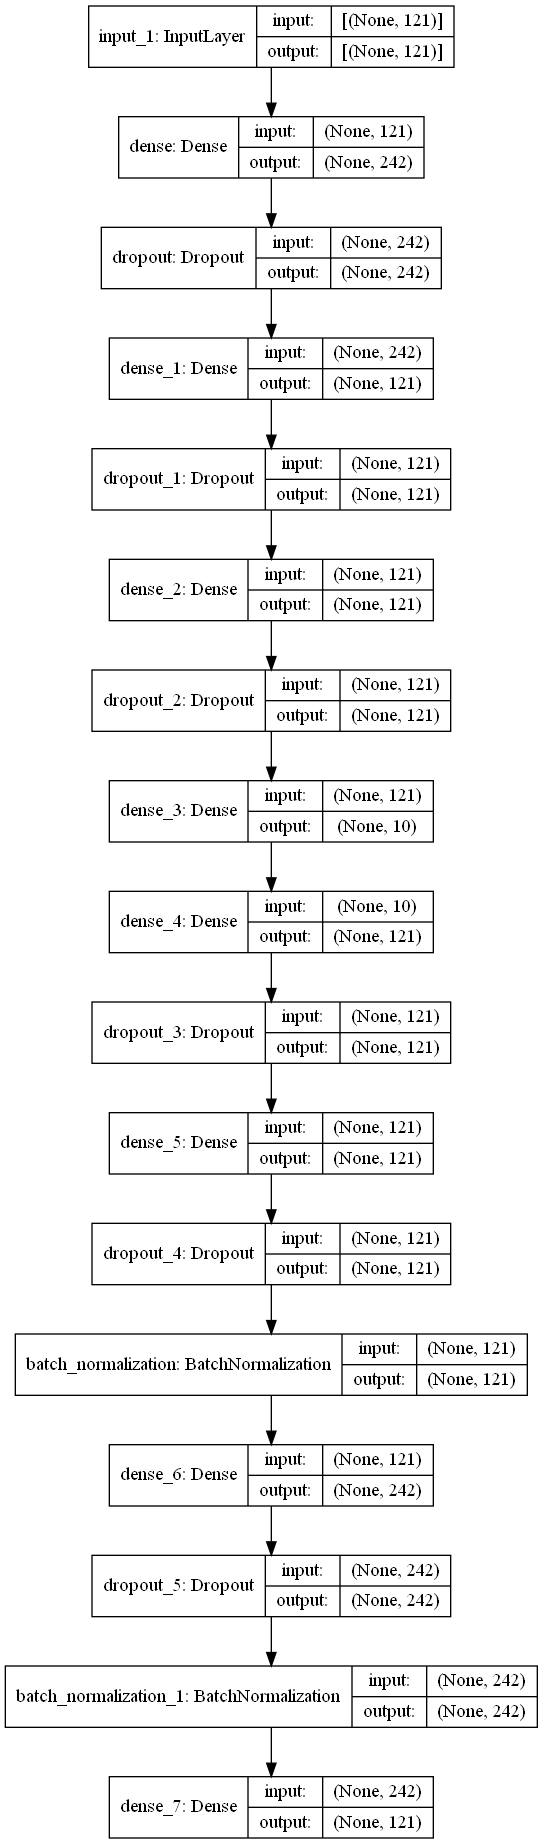

In [62]:
#Defining the Auto Encoder network

##
n_inputs = df_train_pca.shape[1]

#Encoder
input_ = Input(shape=(n_inputs,))
e = Dense(n_inputs*2,activation = 'LeakyReLU',kernel_initializer='he_normal',activity_regularizer=regularizers.l1(10e-4))(input_)
e = Dropout(0.2)(e)
e = Dense(n_inputs,activation = 'LeakyReLU',kernel_initializer='he_normal',activity_regularizer=regularizers.l1(10e-4))(e)
e = Dropout(0.2)(e)
e = Dense(n_inputs,activation = 'LeakyReLU',kernel_initializer='he_normal',activity_regularizer=regularizers.l1(10e-4))(e)
e = Dropout(0.2)(e)
#Code
bottleneck = Dense(10)(e)
#Decoder
d = Dense(n_inputs,activation = 'LeakyReLU',kernel_initializer='he_normal',activity_regularizer=regularizers.l1(10e-4))(bottleneck)
d = Dropout(0.2)(d)
d = Dense(n_inputs,activation = 'LeakyReLU',kernel_initializer='he_normal',activity_regularizer=regularizers.l1(10e-4))(d)
d = Dropout(0.2)(d)
d = BatchNormalization()(d)
d = Dense(n_inputs*2,activation = 'LeakyReLU',kernel_initializer='he_normal',activity_regularizer=regularizers.l1(10e-4))(d)
d = Dropout(0.2)(d)
d = BatchNormalization()(d)
#Output
output = Dense(n_inputs, activation='linear')(d)

model = Model(inputs=input_, outputs=output)
optimizer = Adam(learning_rate=.001)
model.compile(optimizer=optimizer, loss='mse')

plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)

In [63]:
earlystop1 = tensorflow.keras.callbacks.EarlyStopping(monitor = 'loss', 
                            mode="auto",
                            min_delta = 0.0001, 
                            patience = 5,
                            verbose = 1)

history = model.fit(df_train_pca, label_train, epochs=20, batch_size=256, verbose=1, validation_data=(df_test_pca, label_test),callbacks=[earlystop1])

Epoch 1/20
493/493 [==============================] - 8s 11ms/step - loss: 0.3132 - val_loss: 0.2206
Epoch 2/20
493/493 [==============================] - 5s 9ms/step - loss: 0.0744 - val_loss: 0.2002
Epoch 3/20
493/493 [==============================] - 5s 10ms/step - loss: 0.0440 - val_loss: 0.2456
Epoch 4/20
493/493 [==============================] - 4s 9ms/step - loss: 0.0348 - val_loss: 0.2234
Epoch 5/20
493/493 [==============================] - 5s 10ms/step - loss: 0.0293 - val_loss: 0.1956
Epoch 6/20
493/493 [==============================] - 4s 9ms/step - loss: 0.0269 - val_loss: 0.2116
Epoch 7/20
493/493 [==============================] - 5s 9ms/step - loss: 0.0244 - val_loss: 0.2264
Epoch 8/20
493/493 [==============================] - 5s 9ms/step - loss: 0.0232 - val_loss: 0.2071
Epoch 9/20
493/493 [==============================] - 5s 10ms/step - loss: 0.0217 - val_loss: 0.2144
Epoch 10/20
493/493 [==============================] - 4s 9ms/step - loss: 0.0207 - val_loss: 0.

In [64]:
model.save('encoder_full.h5')

In [65]:
encoder = Model(inputs=input_, outputs=bottleneck)
df_train_ae = encoder.predict(df_train_pca)
df_test_ae = encoder.predict(df_test_pca)

pd.DataFrame(df_train_ae).to_csv("df_train_ae.csv")
pd.DataFrame(df_test_ae).to_csv("df_test_ae.csv")